In [6]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
df=pd.read_csv("train (1).csv")
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df_melted=df.melt(
id_vars=['PassengerId','Name'],
 value_vars=['Sex','Age','Fare'],
    var_name='new column information',
    value_name='values'
)
print(df_melted.head(5))
print("\n")
print(df_melted.tail(5))

   PassengerId                                               Name  \
0            1                            Braund, Mr. Owen Harris   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3                             Heikkinen, Miss. Laina   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5                           Allen, Mr. William Henry   

  new column information  values  
0                    Sex    male  
1                    Sex  female  
2                    Sex  female  
3                    Sex  female  
4                    Sex    male  


      PassengerId                                      Name  \
2668          887                     Montvila, Rev. Juozas   
2669          888              Graham, Miss. Margaret Edith   
2670          889  Johnston, Miss. Catherine Helen "Carrie"   
2671          890                     Behr, Mr. Karl Howell   
2672          891                       Dooley, Mr. Patric

In [13]:
df_melted=df.melt(
id_vars=['PassengerId'],
 value_vars=['Survived','Pclass','Embarked'],
    var_name='new column information',
    value_name='values'
)
print(df_melted.head(5))
print("\n")
print(df_melted.tail(5))

   PassengerId new column information values
0            1               Survived      0
1            2               Survived      1
2            3               Survived      1
3            4               Survived      1
4            5               Survived      0


      PassengerId new column information values
2668          887               Embarked      S
2669          888               Embarked      S
2670          889               Embarked      S
2671          890               Embarked      C
2672          891               Embarked      Q


In [14]:
df_melted=df.melt(
id_vars=['PassengerId'],
 value_vars=['SibSp','Parch'],
    var_name='new column information',
    value_name='values'
)
print(df_melted.head(5))
print("\n")
print(df_melted.tail(5))

   PassengerId new column information  values
0            1                  SibSp       1
1            2                  SibSp       1
2            3                  SibSp       0
3            4                  SibSp       1
4            5                  SibSp       0


      PassengerId new column information  values
1777          887                  Parch       0
1778          888                  Parch       0
1779          889                  Parch       2
1780          890                  Parch       0
1781          891                  Parch       0


In [15]:
#group by sex and calculate the survival rate
mean_survival=df.groupby('Sex')['Survived'].mean()
print(mean_survival)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [16]:
#group by pclass and calculate the fare rate
mean_survival=df.groupby('Pclass')['Fare'].mean()
print(mean_survival)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [17]:
#group by pclass and calculate the fare rate
sum_survival=df.groupby('Embarked')['Survived'].sum()
print(sum_survival)

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64


In [19]:
pivot_fill=df.pivot_table(values='Survived',index='Sex',columns='Pclass',aggfunc='mean')
print(pivot_fill)

pivot_fill=df.pivot_table(values='Fare',index='Sex',columns='Embarked',aggfunc='mean')
print(pivot_fill)

pivot_fill=df.pivot_table(values='Fare',index='Embarked',columns='Sex',aggfunc='mean')
print(pivot_fill)

pivot_fill=df.pivot_table(values='PassengerId',index='Pclass',columns='Survived',aggfunc='count')
print(pivot_fill)


# Dataset Size
num_rows, num_cols =df.shape
print(f"Dataset size: {num_rows} rows and {num_cols} columns")

# Missing Values
missing_values_per_column = df.isnull().sum()
percentage_missing = (missing_values_per_column / len(df)) * 100

missing_data_summary = pd.DataFrame({
    'Missing Values': missing_values_per_column,
    'Percentage Missing': percentage_missing
})

print("\nMissing Data Summary:")
print(missing_data_summary[missing_data_summary['Missing Values'] > 0])

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (assuming 'train.csv' is in your current directory)
try:
    df = pd.read_csv('train (1).csv')
except FileNotFoundError:
    print("Error: 'train.csv' not found. Please upload the file or correct the path.")
    exit()


# Passenger Class Distribution
pclass_counts = df['Pclass'].value_counts()
print("Passenger Class Distribution:")
print(pclass_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', data=df)
plt.title('Distribution of Passengers Across Different Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.show()

# Age Distribution
print("\nAge Distribution:")
print(df['Age'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

# Gender Distribution
gender_counts = df['Sex'].value_counts()
print("\nGender Distribution:")
print(gender_counts)
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Passengers')
plt.ylabel('')  
plt.show()


# Combined Table for Passenger Demographics
demographics_table = pd.DataFrame({
    'Passenger Class': pclass_counts.index,
    'Count': pclass_counts.values,
    'Age Mean': df.groupby('Pclass')['Age'].mean(),
    'Age Median': df.groupby('Pclass')['Age'].median(),
    'Male Count': df[df['Sex'] == 'male'].groupby('Pclass')['Sex'].count(),
    'Female Count': df[df['Sex'] == 'female'].groupby('Pclass')['Sex'].count()

})
print("\nPassenger Demographics Table:")
demographics_table


Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


Overall Survival Rate: 38.38%

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


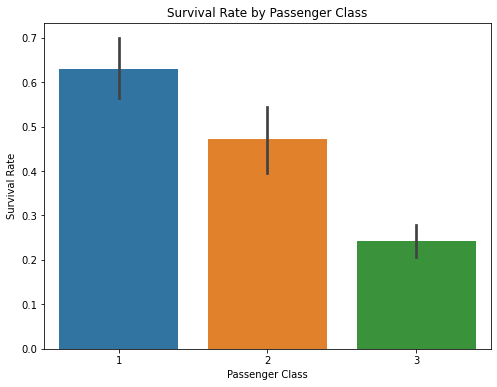

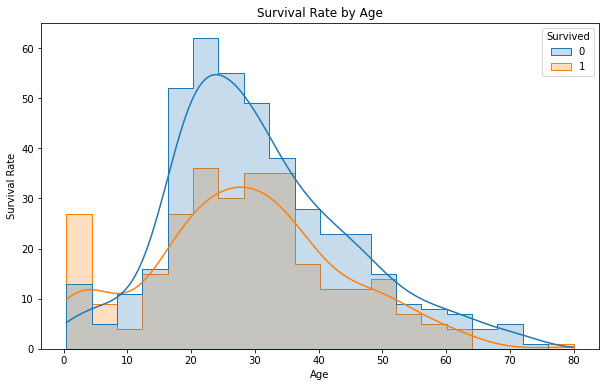


Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


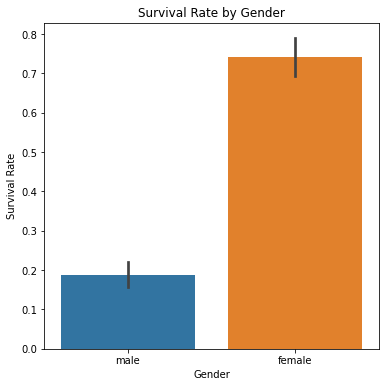


Survival Rate by Family Size:
FamilySize
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64


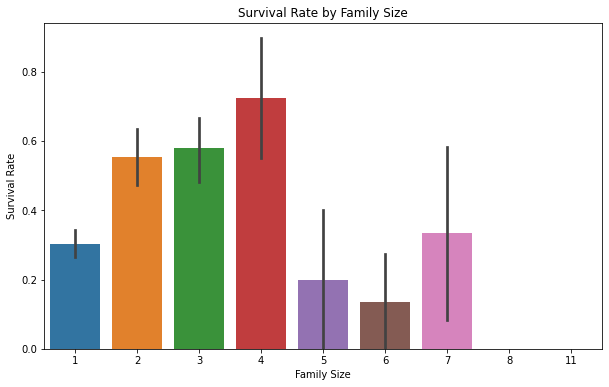

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Overall Survival Rate
overall_survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {overall_survival_rate:.2%}")

# Survival Rate by Passenger Class
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival Rate by Passenger Class:")
print(survival_by_class)

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()


# Survival Rate by Age
plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Survived', data=df, kde=True, element="step")
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()


# Survival Rate by Gender
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("\nSurvival Rate by Gender:")
print(survival_by_gender)

plt.figure(figsize=(6, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

# Family Size and Survival
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
survival_by_family_size = df.groupby('FamilySize')['Survived'].mean()
print("\nSurvival Rate by Family Size:")
print(survival_by_family_size)

plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.show()



Ticket Fare Statistics:

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
Correlation between Fare and Pclass: -0.5494996199439078
Survival Rate by Cabin Availability:
HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


<AxesSubplot:xlabel='HasCabin', ylabel='Fare'>

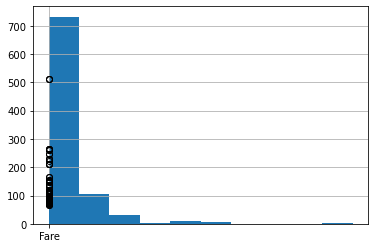

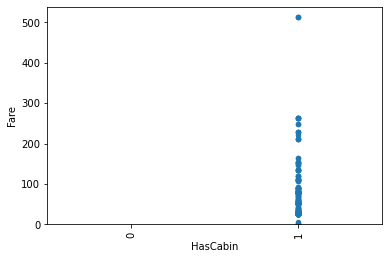

In [37]:
fare_stats = df['Fare'].describe()
print("\nTicket Fare Statistics:\n")
print(fare_stats)
df.boxplot(column=['Fare'])
df['Fare'].hist()

fare_pclass_corr = df['Fare'].corr(df['Pclass'])
print(f"Correlation between Fare and Pclass: {fare_pclass_corr}")
df.plot.scatter(x='Pclass', y='Fare')

df['HasCabin'] = df['Cabin'].notna().astype(int)
survival_rate_by_cabin = df.groupby('HasCabin')['Survived'].mean()
print("Survival Rate by Cabin Availability:")
print(survival_rate_by_cabin)
survival_rate_by_cabin.plot(kind='bar')



Distribution of Passengers by Embarkation Port:

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Survival Rate by Embarkation Port:

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Embarked'>

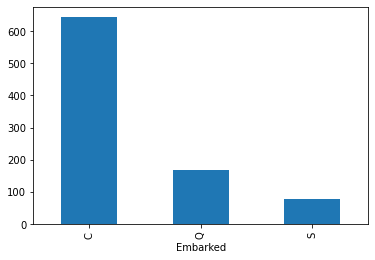

In [40]:

embarkation_distribution = df['Embarked'].value_counts()
print("\nDistribution of Passengers by Embarkation Port:\n")
print(embarkation_distribution)
embarkation_distribution.plot(kind='bar')
survival_rate_by_embarkation = df.groupby('Embarked')['Survived'].mean()
print("\nSurvival Rate by Embarkation Port:\n")
print(survival_rate_by_embarkation)
survival_rate_by_embarkation.plot(kind='bar')

In [ ]:
"""
Additional Insights
Beyond the basic demographics and survival correlations, the Titanic data reveals some intriguing patterns. Wealthier passengers, women, and children generally had higher survival rates, suggesting that social status and societal norms played a role in who was prioritized during the disaster. Traveling with family, particularly in smaller groups, appeared to improve survival chances, possibly due to mutual support. While less pronounced, the port of embarkation also showed a slight correlation with survival, hinting at potential differences in passenger demographics or cabin allocations across embarkation points.

Potential Biases and Limitations
It's crucial to acknowledge that the Titanic dataset has limitations. Missing data, particularly for age and cabin information, could introduce bias if it's not random. The dataset also represents a specific sample of passengers and might not be fully representative of the broader population. Furthermore, it focuses on survivors and casualties, neglecting those who might have avoided the tragedy altogether. Unrecorded factors like physical fitness or social connections could have also influenced survival. Finally, historical context is key, as maritime practices and safety regulations have evolved considerably since the Titanic era, potentially limiting the applicability of these findings to modern scenarios.
"""

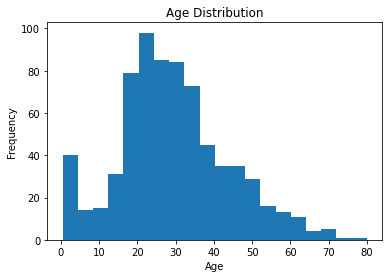

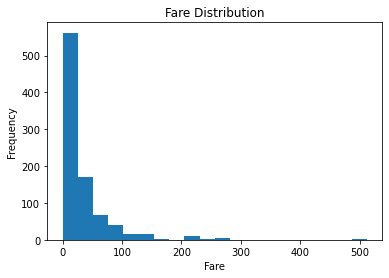

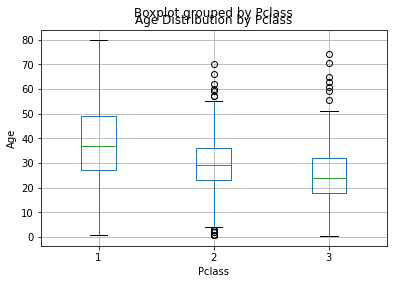

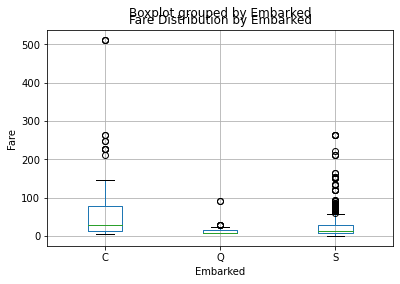

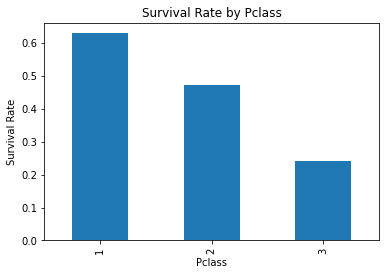

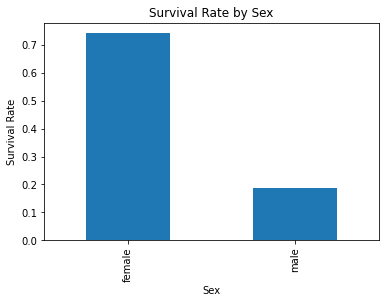

In [39]:


# Histogram of Age
import matplotlib.pyplot as plt
plt.hist(df['Age'].dropna(), bins=20)  # dropna() to remove missing values
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

# Histogram of Fare
plt.hist(df['Fare'], bins=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Distribution')
plt.show()

# Box plot of Age by Pclass
df.boxplot(column=['Age'], by=['Pclass'])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Pclass')
plt.show()

# Box plot of Fare by Embarked
df.boxplot(column=['Fare'], by=['Embarked'])
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.title('Fare Distribution by Embarked')
plt.show()

# Bar plot of Survival Rate by Pclass
survival_rate_by_pclass = df.groupby('Pclass')['Survived'].mean()
survival_rate_by_pclass.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Pclass')
plt.show()

# Bar plot of Survival Rate by Sex
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()
survival_rate_by_sex.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()
